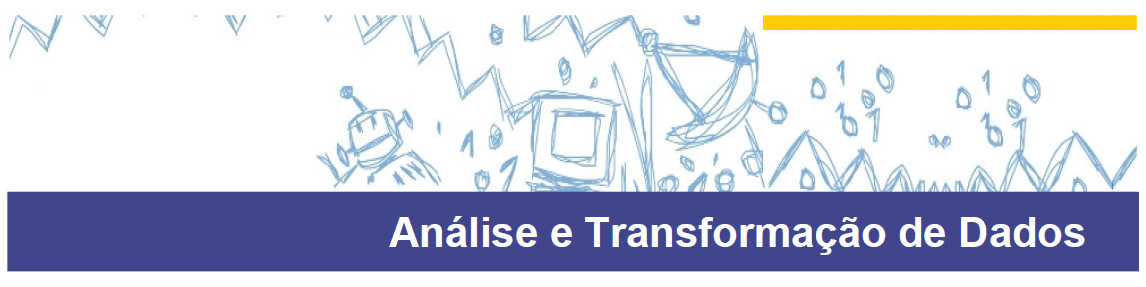
### Uma Resolução da Ficha Prática nº 8 de ATD 2022 em MATLAB
Alberto Cardoso ©DEI2021/2022

Objetivo: Pretende-se usar a Transformada de Fourier Discreta (DFT) para ilustrar os conceitos de frequência em sinais áudio e em imagens e para efetuar a sua análise no tempo e na frequência, usando a Transformada de Fourier em Janelas (STFT) de dimensão fixa.

**Exercício 1.** Considerar o sinal de áudio do ficheiro 'escala.wav' (disponível no Nónio).

**Exercício 1.1** Ler e escutar o sinal áudio, utilizando as funções do Matlab *audioread* e *sound*.

FP8 - Exercício 1.1



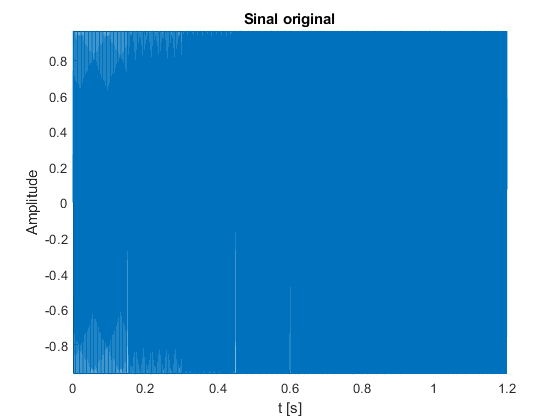

In [1]:
disp('FP8 - Exercício 1.1');
%% Ex1.1 Ler e escutar o sinal áudio
[x,fs] = audioread('escala.wav');
%[x,fs] = audioread('sax-phrase-short.wav');
sound(x,fs)

t = linspace(0,(length(x)-1)/fs,length(x));

figure(1)
plot(t,x)
axis tight
xlabel('t [s]')
ylabel('Amplitude')
title('Sinal original')

**Exercício 1.2** Indicar a frequência de amostragem ($f_s$), o período fundamental ($N$) e a frequência fundamental ($\Omega_0$) do sinal de tempo discreto $x[n]$ e a resolução em frequência (em Hz).

In [2]:
disp('FP8 - Exercício 1.2');
%% Ex 1.2
disp('frequência de amostragem, fs, [Hz]:')
fs
Ts = 1/fs;

disp('período fundamental, N:')
N = numel(x)

disp('frequência angular fundamental, Omega0, [rad]')
Omega0 = 2*pi/N

disp('resolução em frequência [Hz]:')
deltaf = fs/N

FP8 - Exercício 1.2
frequência de amostragem, fs, [Hz]:

fs =

        8000

período fundamental, N:

N =

        9608

frequência angular fundamental, Omega0, [rad]

Omega0 =

   6.5395e-04

resolução em frequência [Hz]:

deltaf =

    0.8326




**1.3**	Obter e representar o espetro (magnitude) de $x[n]$, usando as funções *fft*, *fftshift* e *abs*.

FP8 - Exercício 1.3



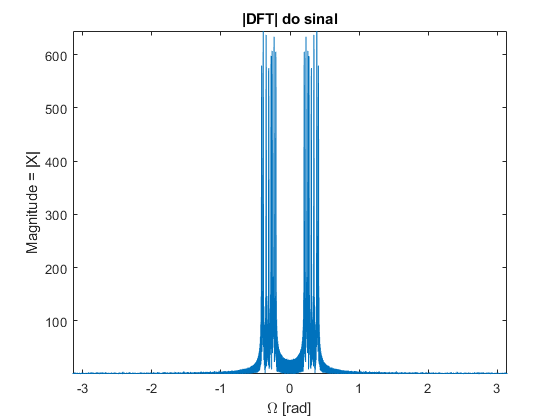

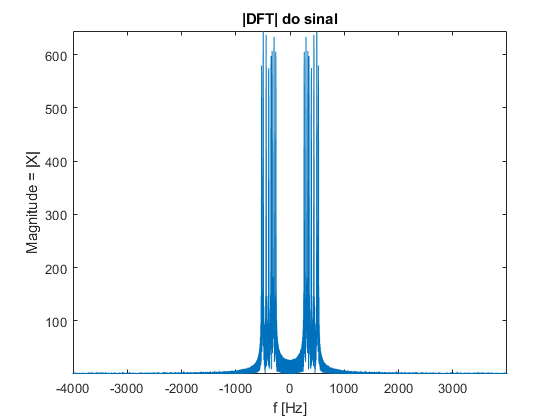

In [3]:
disp('FP8 - Exercício 1.3');
%% Ex 1.3

X = fftshift(fft(x)); % DFT do sinal

% calcular o vetor de frequências
if (mod(N,2)==0)
    % se o número de pontos do sinal for par
    f = -fs/2:fs/N:fs/2-fs/N;
else
    % se o número de pontos do sinal for ímpar
    f = -fs/2+fs/(2*N):fs/N:fs/2-fs/(2*N);
end
if (mod(N,2)==0)
    Omega = -Omega0*N/2:Omega0:Omega0*N/2-Omega0; % em rad
else
    Omega = -Omega0*N/2+Omega0/2:Omega0:Omega0*N/2-...
        Omega0/2;
end

m_X = abs(X); % magnitude do sinal

figure(2)
plot(f,m_X), hold on
title('|DFT| do sinal');
ylabel('Magnitude = |X|')
xlabel('f [Hz]')
axis tight
figure(3)
plot(Omega,m_X)
title('|DFT| do sinal');
ylabel('Magnitude = |X|')
xlabel('\Omega [rad]')
axis tight

**1.4**	Identificar as frequências angulares ($\Omega$ em $rad$) e as frequências ($f$ em Hz) mais relevantes do sinal (considerar as frequências cujas componentes têm magnitude superior a, por exemplo, 20\% do valor máximo).

FP8 - Exercício 1.4

max_x =

  644.5616


min_mag =

  515.6493


f_relev =

  262.2814  293.9217  329.7252  348.0433  393.0058  440.4663  493.7552  522.8976

   262   294   330   348   393   440   494   523

Frequências angulares: 

Omega_relev =

    0.2060    0.2308    0.2590    0.2734    0.3087    0.3459    0.3878    0.4107




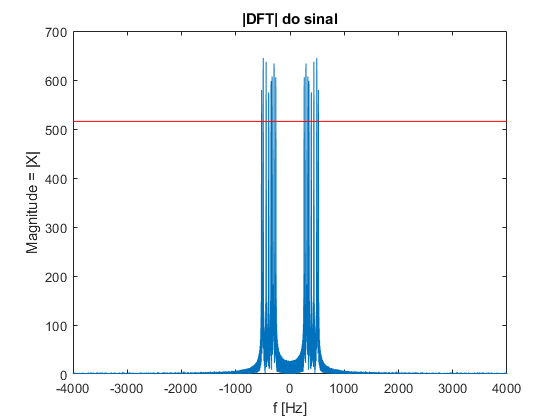

In [4]:
disp('FP8 - Exercício 1.4');
%% Ex 1.4

figure(4)
plot(f,m_X)
title('|DFT| do sinal');
ylabel('Magnitude = |X|')
xlabel('f [Hz]')
hold on

max_x = max(m_X)
min_mag = 0.8*max_x
%min_mag = 0.2*max_x   % limiar ajustado em função das caracerísticas do sinal
plot(f, repmat(min_mag,N,1),'r')
hold off
[pks,locs] = findpeaks(m_X,'MinPeakHeight',min_mag);
%locs=find(m_X>0.8*max_x)
f_relev = f(locs);
f_relev = f_relev(f_relev>0)
disp(round(f_relev))

disp('Frequências angulares: ')
Omega_relev = Omega(locs);
Omega_relev = Omega_relev(Omega_relev>0)

**1.5**	Determinar as notas musicais associadas às frequências mais relevantes do sinal, considerando a seguinte tabela:
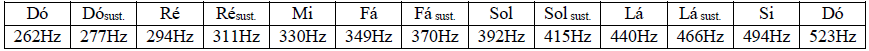

**Nota sobre o Exercício 1**:
A tabela apresentada no enunciado do exercício corresponde a uma parte do conjunto de todas as notas musicais. Os sons audíveis pelos humanos correspondem, usualmente, a frequências compreendidas entre 20Hz e 20KHz. Estando as notas musicais organizadas por oitavas, as suas frequências tomam o valor do dobro da frequência das notas uma oitava acima e reduzem a metade quando estão uma oitava abaixo. Na figura seguinte apresenta-se um conjunto mais alargado de notas musicais e respetivas frequências (com os valores mais exatos), sendo as notas correspondentes às teclas pretas os sustenidos.
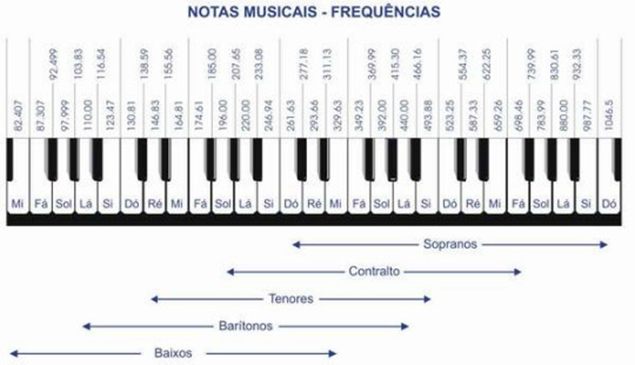

In [5]:
disp('FP8 - Exercício 1.5');

%% Ex 1.5

f_notas = [262 277 294 311 330 349 370 392 415 440 466 ...
    494 523 587 659 698 784 880 988 1047 1174 1318 1396 ...
    1568 1760 1976 2094 2348 2636 2792 3136 3520 3952 4188 4696 5272]';
notas = {'Dó   '; 'DóS  '; 'Ré   '; 'RéS  '; 'Mi   ';...
    'Fá   '; 'FáS  '; 'Sol  '; 'SolS '; 'Lá   '; 'LáS  '; 'Si   ';...
    'Dó2  '; 'DóS2 '; 'Ré2  '; 'RéS2 '; 'Mi2  ';...
    'Fá2  '; 'FáS2 '; 'Sol2  '; 'SolS2'; 'Lá2  '; 'Lás2 '; 'Si2  ';...
    'Dó3  '; 'Dó s3'; 'Ré3  '; 'Rés 3'; 'Mi2  ';...
    'Fá3  '; 'FáS3 '; 'Sol3  '; 'SolS3'; 'Lá3  '; 'LáS3 '; 'Si3  '};

ind_nj = [];

for k = 1:length(f_relev)
    
    % encontrar quais as notas na gama de frequências 
    % [f_relevant(k)-9Hz, f_relevant(k)+9Hz]
    
    ind_freq = find(abs(f_notas-f_relev(k))<9);
    
    ind_nj = [ind_nj; ind_freq];

end

disp('Notas musicais presentes no sinal:');
notas_xj = notas(ind_nj,:)

FP8 - Exercício 1.5
Notas musicais presentes no sinal:

notas_xj =

  8x1 cell array

    {'Dó   '}
    {'Ré   '}
    {'Mi   '}
    {'Fá   '}
    {'Sol  '}
    {'Lá   '}
    {'Si   '}
    {'Dó2  '}




**Exercício 1.6** Repetir o exercício para outro sinal de áudio como, por exemplo, o 'sax-phrase-short.wav'.

In [6]:
disp('FP8 - Exercício 1.6');

% Alterar em 1.1 o sinal a considerar

FP8 - Exercício 1.6



**Exercício 2** A Transformada de Fourier Discreta (DFT) possibilita o processamento de imagens permitindo, por exemplo, a análise computacional de imagens, a filtragem de imagens, a extração de características, a compressão / reconstrução de imagens, etc. A aplicação da DFT permite decompor uma imagem em termos das suas componentes sinusoidais, aceitando como entrada uma imagem definida no domínio do espaço real, produzindo como saída uma imagem definida no domínio das frequências espaciais. Um ponto na imagem de saída corresponde a uma frequência na imagem de entrada. Por exemplo, o pixel no centro geométrico da imagem de saída corresponde à componente DC da imagem. Quando os restantes pixéis são percorridos do centro para a periferia obtêm-se valores crescentes de frequências na imagem de entrada.
Considerar a imagem do ficheiro **'peppers.bmp'**.


**Exercício 2.1** Ler a imagem usando a função *imread*.

In [7]:
disp('FP8 - Exercício 2.1');
[imagem, map] = imread('peppers.bmp');

FP8 - Exercício 2.1



**Exercício 2.2** Representar a imagem original, usando a função *imshow*.

FP8 - Exercício 2.2



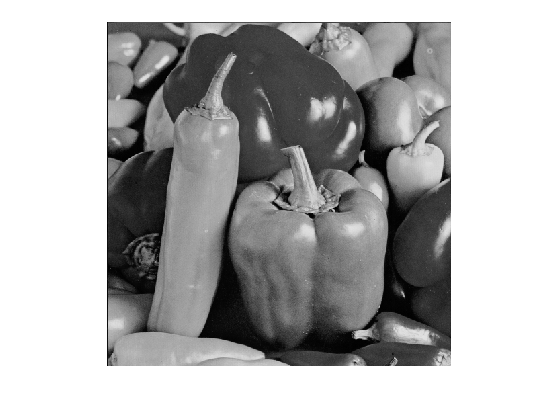

In [8]:
disp('FP8 - Exercício 2.2');
figure(5)
imshow(imagem, map);

**Exercício 2.3** Obter as componentes de frequência da imagem usando as funções *fft2* e *fftshift* e representar graficamente a sua magnitude em função do domínio definido em termos das dimensões (entre $-N/2$ e $N/2$) da imagem (considere a função *mesh* e $20*log10(abs(  ))$).
Caraterizar a magnitude do espetro da imagem e obter a cor média da imagem (vetor do mapa de cores correspondente à componente DC da imagem ou à frequência zero).


FP9 - Exercício 2.3
Índice da cor média no mapa de cores da imagem:

C0 =

  104.2099


ans =

  104.2099




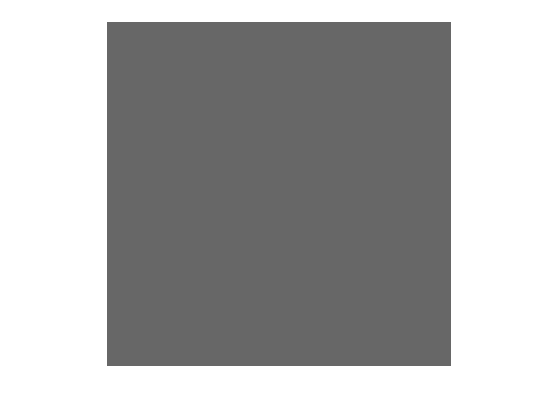

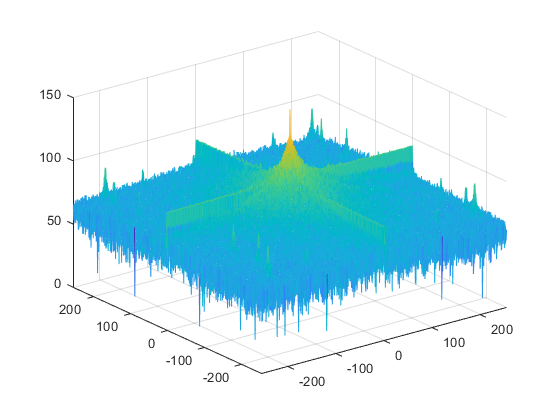

In [9]:
disp('FP9 - Exercício 2.3');
%Ex 2.3
X_imagem = fftshift(fft2(imagem));

N = length(X_imagem);
figure(6)
mesh(-N/2:N/2-1, -N/2:N/2-1, 20*log10(abs(X_imagem)));
axis([-N/2 N/2 -N/2 N/2]);
view([-37.5 30]);
%rotate3d;

disp('Índice da cor média no mapa de cores da imagem:')
C0=abs(X_imagem(N/2+1,N/2+1))/N/N
mean(mean(imagem))

figure(7)
imshow(C0*ones(size(imagem)), map);

**Exercício 3.** Para efetuar a análise de sinais simultaneamente no tempo e na frequência pode recorrer-se à Transformada de Fourier em Janelas (STFT – *Short Time Fourier Transform*).

**Exercício 3.1** Ler o sinal áudio do ficheiro **'escala.wav'** e determinar a frequência mais relevante em sucessivas janelas temporais com duração e sobreposição apropriadas (i.e., duração: 128ms e sobreposição: 64ms). Em cada janela, determinar a magnitude do espetro recorrendo a uma janela de *Hamming* (função ***hamming*** do Matlab) e selecionar a frequência fundamental como sendo a frequência mais relevante (valor da DFT com maior amplitude).

FP8 - Exercício 3.1



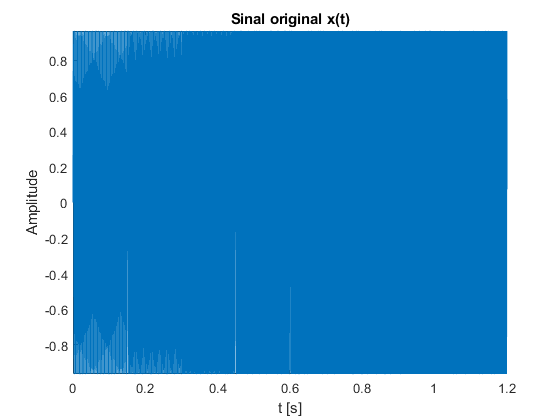

In [10]:
disp('FP8 - Exercício 3.1');
%% Ex3.1 Ler o sinal áudio

fich_wav = 'escala.wav';
%fich_wav = 'sax-phrase-short.wav';

[x,fs] = audioread(fich_wav);
sound(x,fs)

t = linspace(0,(length(x)-1)/fs,length(x));

plot(t,x)
axis tight
xlabel('t [s]')
ylabel('Amplitude')
title('Sinal original x(t)')

frequência de amostragem, f, [Hz]:

fs =

        8000

período fundamental, N:

N =

        9608




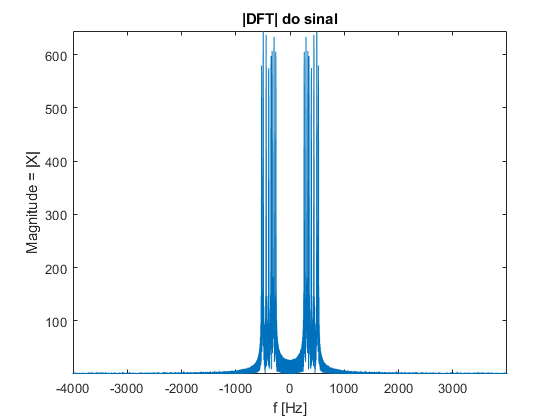

In [11]:
disp('frequência de amostragem, f, [Hz]:')
fs
Ts = 1/fs;

disp('período fundamental, N:')
N = numel(x)

X = fftshift(fft(x)); % DFT do sinal

% calcular o vetor de frequências
if (mod(N,2)==0)
    % se o número de pontos de pontos do sinal for par
    f = -fs/2:fs/N:fs/2-fs/N;
else
    % se o número de pontos de pontos do sinal for ímpar
    f = -fs/2+fs/(2*N):fs/N:fs/2-fs/(2*N);
end

m_X = abs(X); % magnitude do sinal com ruído

plot(f,m_X)
title('|DFT| do sinal');
ylabel('Magnitude = |X|')
xlabel('f [Hz]')
axis tight


Tframe =

    0.1280


Toverlap =

    0.0640


Nframe =

        1024


Noverlap =

   512




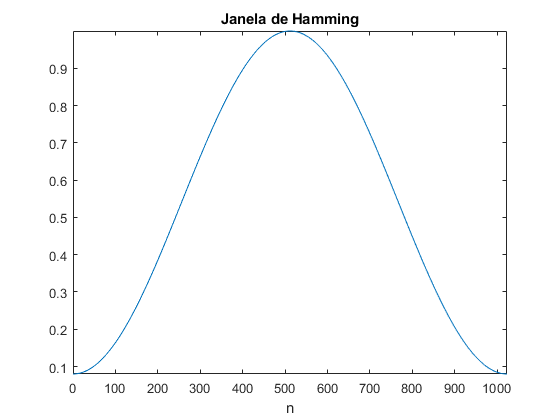

In [12]:
Tframe = 0.128 % largura da janela de análise em s
Toverlap = 0.064 % sobreposiçao das janelas em s
Nframe = round(Tframe*fs) % número de amostras na janela
Noverlap = round(Toverlap*fs) % número de amostras sobrepostas na janela

h = hamming(Nframe); % janela de hamming

if mod(Nframe, 2)==0
    f_frame = -fs/2:fs/Nframe:fs/2-fs/Nframe;
else 
    f_frame = -fs/2+fs/(2*Nframe):fs/Nframe:...
        fs/2-fs/(2*Nframe);
end

plot(0:Nframe-1,h)
axis tight
xlabel('n')
title('Janela de Hamming')

In [13]:
f_relev = [];
nframes = 0; % para guardar
tframes = [];

for ii = 1:Nframe-Noverlap:N-Nframe+1
    % aplicar a janela ao sinal do tempo
    x_frame = x(ii:ii+Nframe-1).*h;
    
    % obter a magnitude da fft do sinal
    m_X_frame = abs(fftshift(fft(x_frame)));
    
    % obter o máximo da magnitude do sinal
    m_X_frame_max = max(m_X_frame);
    
    % encontrar os índices do máximo da magnitude do sinal
    ind = find(abs(m_X_frame-m_X_frame_max)<0.001);
    
    % encontrar as frequências correspondentes ao máximo de magnitude
    f_relev = [f_relev, f_frame(ind(2))];
    
    nframes = nframes+1;
    
    % calcular o vetor de tempo correspondente a cada janela, que aqui
    % corresponde ao valor do vetor de tempos, t, em cada janela
    t_frame = t(ii:ii+Nframe-1);
    tframes = [tframes, t_frame(round(Nframe/2)+1)];
end

f_relev'


ans =

  257.8125
  257.8125
  296.8750
  296.8750
  328.1250
  328.1250
  328.1250
  351.5625
  351.5625
  390.6250
  390.6250
  437.5000
  437.5000
  437.5000
  492.1875
  492.1875
  523.4375




**Exercício 3.2** Indicar a resolução em frequência em cada janela e representar graficamente a sucessão temporal de frequências mais relevantes do sinal em função da frequência $f$ em Hz.

FP8 - Exercício 3.2

deltaf =

    7.8125


tframes =

  Columns 1 through 16

    0.0640    0.1280    0.1920    0.2560    0.3200    0.3840    0.4480    0.5120    0.5760    0.6400    0.7040    0.7680    0.8320    0.8960    0.9600    1.0240

  Column 17

    1.0880


tframes2 =

  Columns 1 through 16

    0.0640    0.1280    0.1920    0.2560    0.3200    0.3840    0.4480    0.5120    0.5760    0.6400    0.7040    0.7680    0.8320    0.8960    0.9600    1.0240

  Column 17

    1.0880




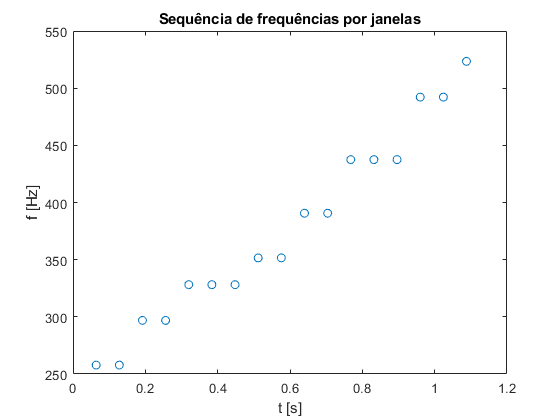

In [14]:
disp('FP8 - Exercício 3.2');
%% Ex. 3.2

deltaf = fs/Nframe
deltat = Tframe-Toverlap;

tframes
% outra maneira de calcular o tframes tendo como valor 
% o tempo de início da janela
tframes2 = deltat:deltat:deltat*nframes
figure()
plot(tframes,f_relev,'o')
xlabel('t [s]');
ylabel('f [Hz]');
title('Sequência de frequências por janelas');


**Exercício 3.3** Comparar o resultado com o espectrograma obtido com a função ***spectrogram***.

FP8 - Exercício 3.3

f_relev_spect =

  257.8125
  257.8125
  296.8750
  296.8750
  328.1250
  328.1250
  328.1250
  351.5625
  351.5625
  390.6250
  390.6250
  437.5000
  437.5000
  437.5000
  492.1875
  492.1875
  523.4375




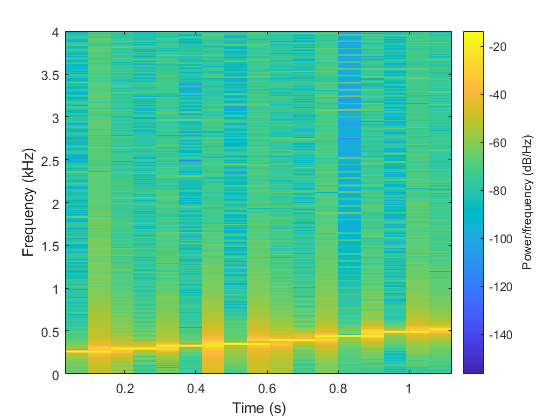

In [15]:
disp('FP8 - Exercício 3.3');
%% Ex 3.3 

figure()
spectrogram(x,Nframe,Noverlap,[],fs,'yaxis')

[s,f,t,p] = spectrogram(x,Nframe,Noverlap,[],fs);
% Encontrar os máximos em cada janela temporal (p=Power Spectral density - PSD)
[max_PSD,ind] = max(p);
f_relev_spect = f(ind)

**Exercício 3.4** Determinar a sequência de notas musicais associadas a essas frequências do sinal.

In [16]:
disp('FP8 - Exercício 3.4');
%% Ex 3.4

ind_nj = [];

for k = 1:length(f_relev)
    
    % encontrar quais as notas na gama de frequências 
    % [f_relev(k)-9Hz, f_relev(k)+9Hz]
    
    ind_freq = find(abs(f_notas-f_relev(k))<9);
    
    ind_nj = [ind_nj; ind_freq];

end

disp('Sequência de notas musicais em cada janela:');
notas_xj = notas(ind_nj,:)


FP8 - Exercício 3.4
Sequência de notas musicais em cada janela:

notas_xj =

  17x1 cell array

    {'Dó   '}
    {'Dó   '}
    {'Ré   '}
    {'Ré   '}
    {'Mi   '}
    {'Mi   '}
    {'Mi   '}
    {'Fá   '}
    {'Fá   '}
    {'Sol  '}
    {'Sol  '}
    {'Lá   '}
    {'Lá   '}
    {'Lá   '}
    {'Si   '}
    {'Si   '}
    {'Dó2  '}


